In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5466,spam,http//tms. widelive.com/index. wml?id=820554ad...,NaN,NaN,NaN
1821,ham,I couldn't say no as he is a dying man and I f...,NaN,NaN,NaN
1036,ham,"No my blankets are sufficient, thx",NaN,NaN,NaN
2225,ham,Alrite jod hows the revision goin? Keris bin d...,NaN,NaN,NaN
4126,ham,"Sorry, I'll call later",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
4660,ham,Ok no prob...
1685,ham,Cramps stopped. Going back to sleep
1631,ham,We not watching movie already. Xy wants 2 shop...
4028,ham,"[Û_] anyway, many good evenings to u! s"
4143,ham,That's a shame! Maybe cld meet for few hrs tomo?


In [8]:
df.rename(columns={'v1':'output','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,output,text
4687,ham,Hmmm.but you should give it on one day..
5506,ham,God's love has no limit. God's grace has no me...
1399,ham,You have registered Sinco as Payee. Log in at ...
5528,ham,Its just the effect of irritation. Just ignore it
4830,ham,Po de :-):):-):-):-). No need job aha.


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['output']=encoder.fit_transform(df['output'])

In [11]:
df.head()

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#missing values
df.isnull().sum()

output    0
text      0
dtype: int64

In [13]:
#check for duplicate values
df.duplicated().sum()

403

In [14]:
#remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape

(5169, 2)

# 2.EDA

In [15]:
df['output'].value_counts()

0    4516
1     653
Name: output, dtype: int64

In [16]:
import nltk

In [17]:
!pip install nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['chars']=df['text'].apply(len)

In [20]:
df.head()

,output,text,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [25]:
df.head()

,output,text,chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sen']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,output,text,chars,num_words,num_sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
#ham
df[df['output']==0][['chars','num_words','num_sen']].describe()

,chars,num_words,num_sen
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['output']==1][['chars','num_words','num_sen']].describe()

,chars,num_words,num_sen
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


# 3.Data Preprocessing

In [35]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [41]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
transform_text('I loved your bag?')

'love bag'

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

In [45]:
df.head()

,output,text,chars,num_words,num_sen,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
!pip install wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc=wc.generate(df[df['output']==1]['transformed_text'].str.cat(sep=" "))

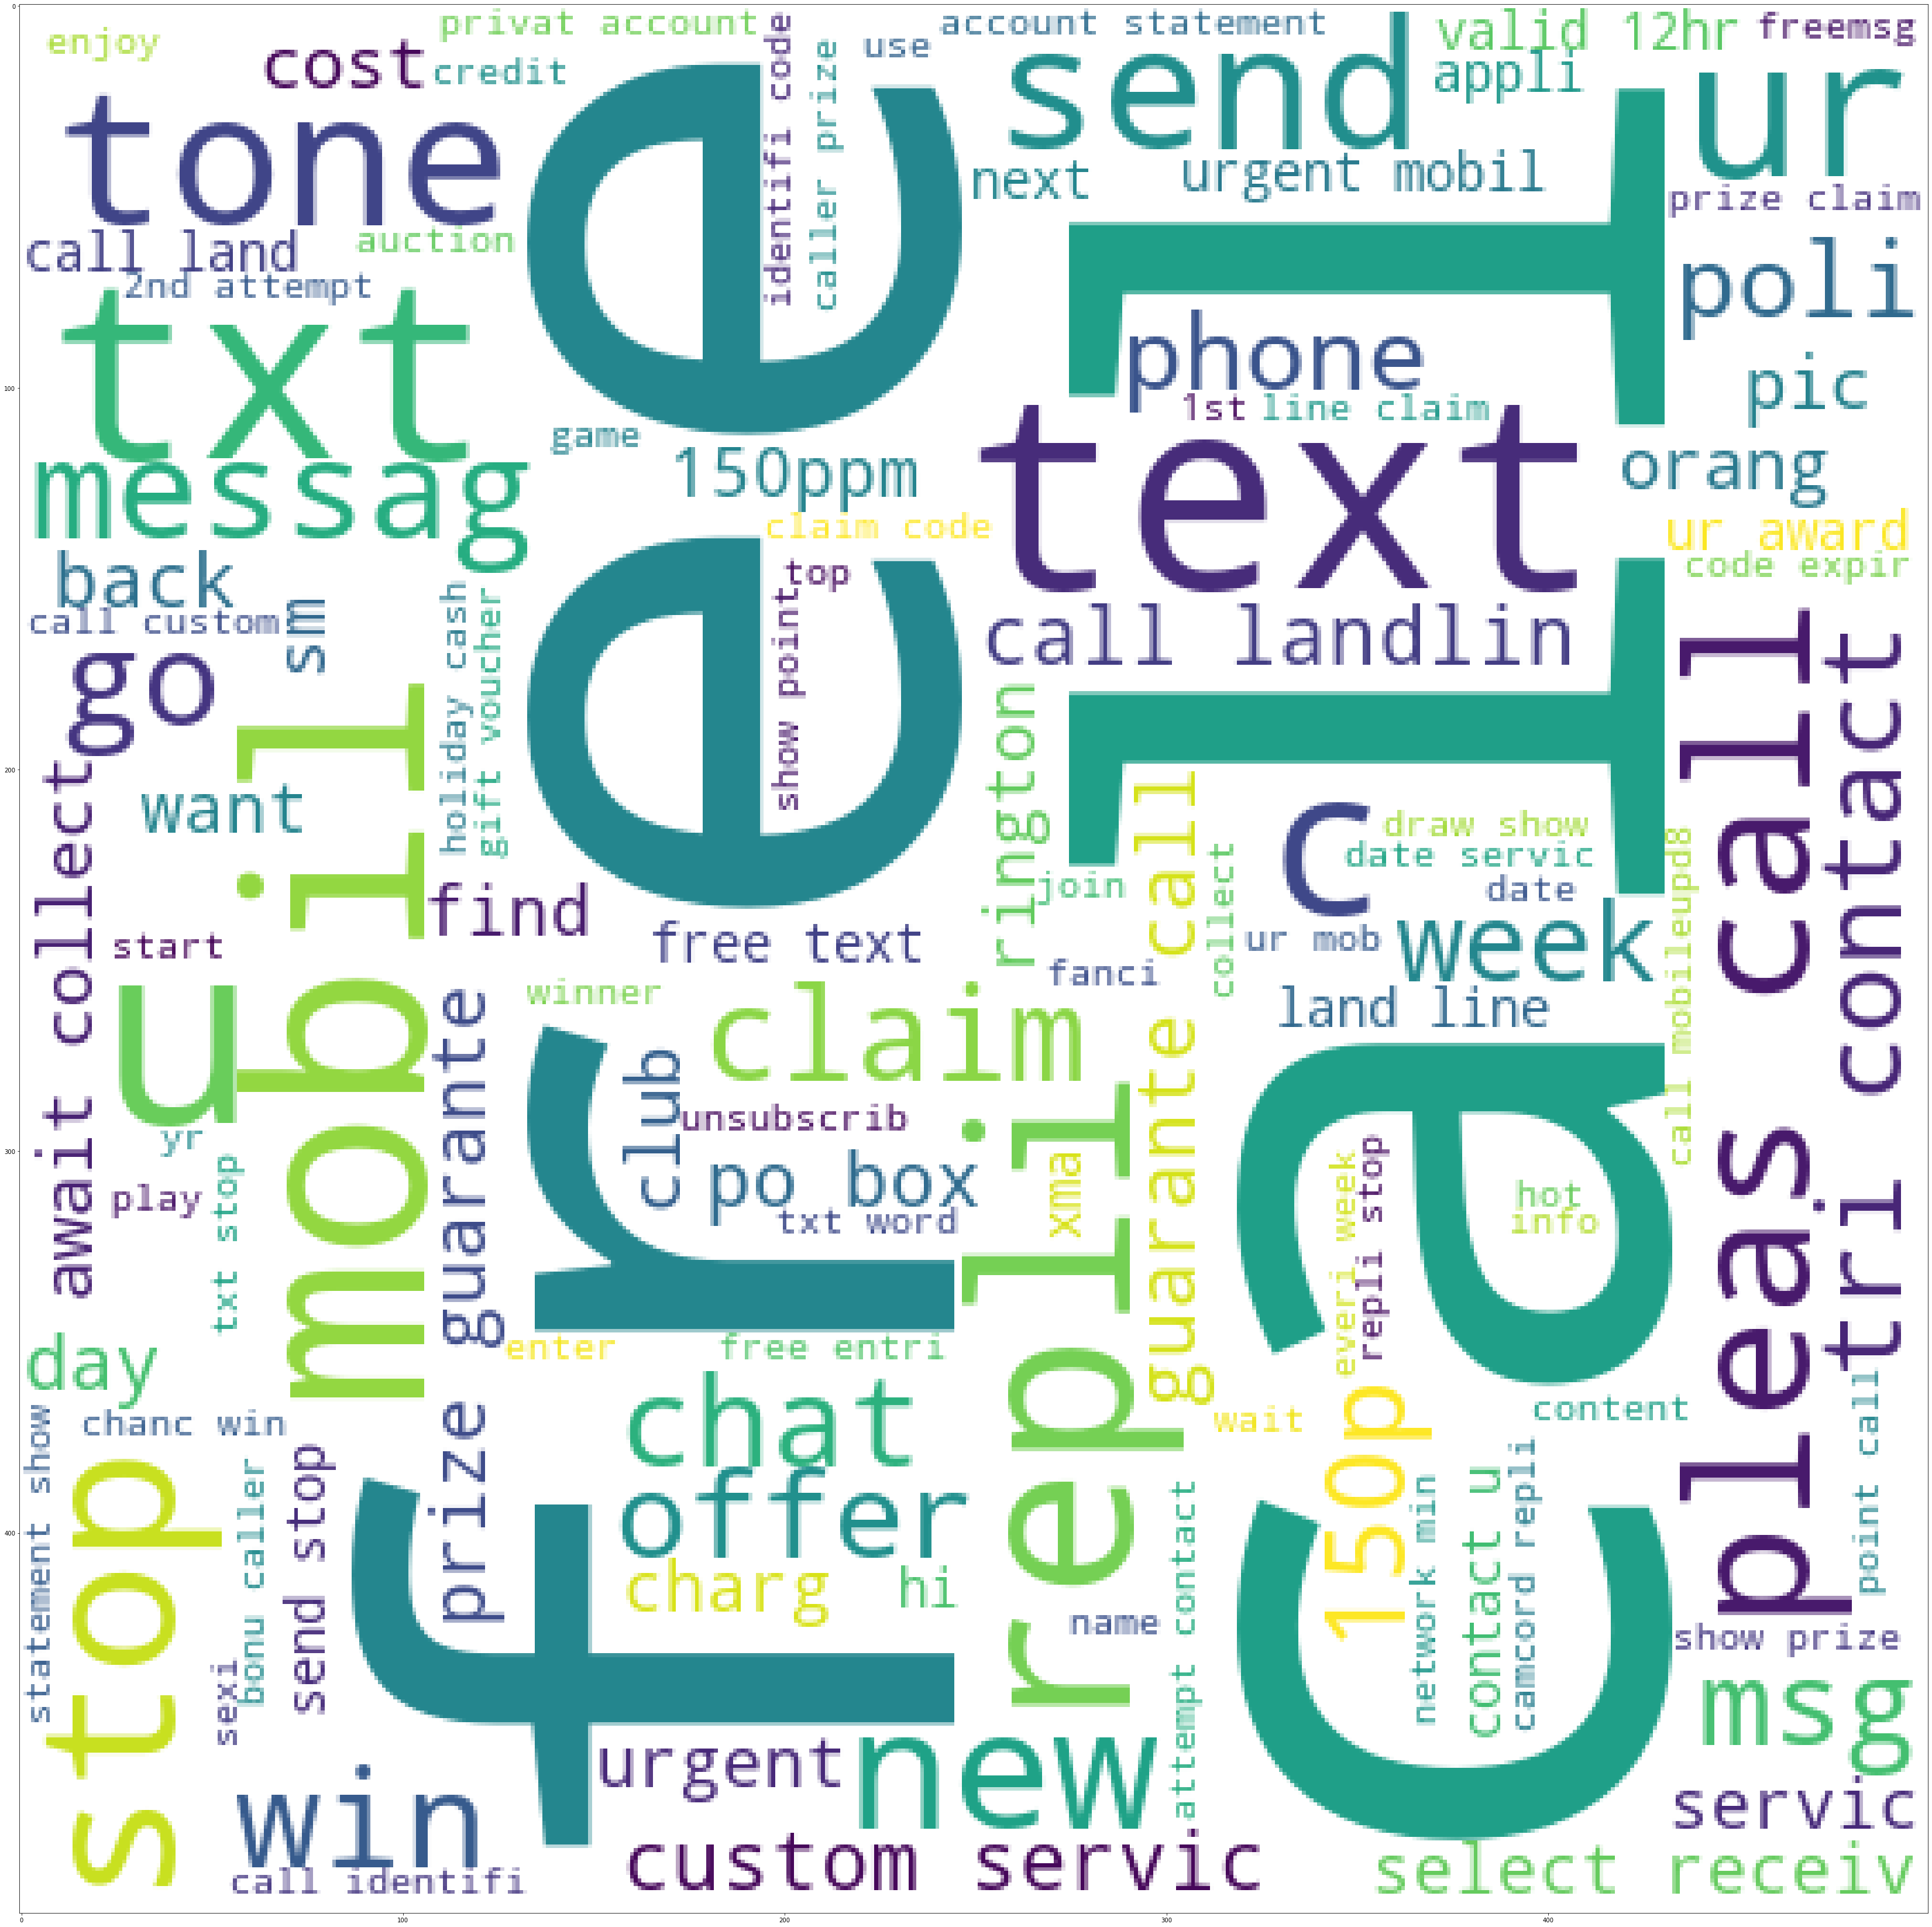

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(180,60))
plt.imshow(spam_wc)

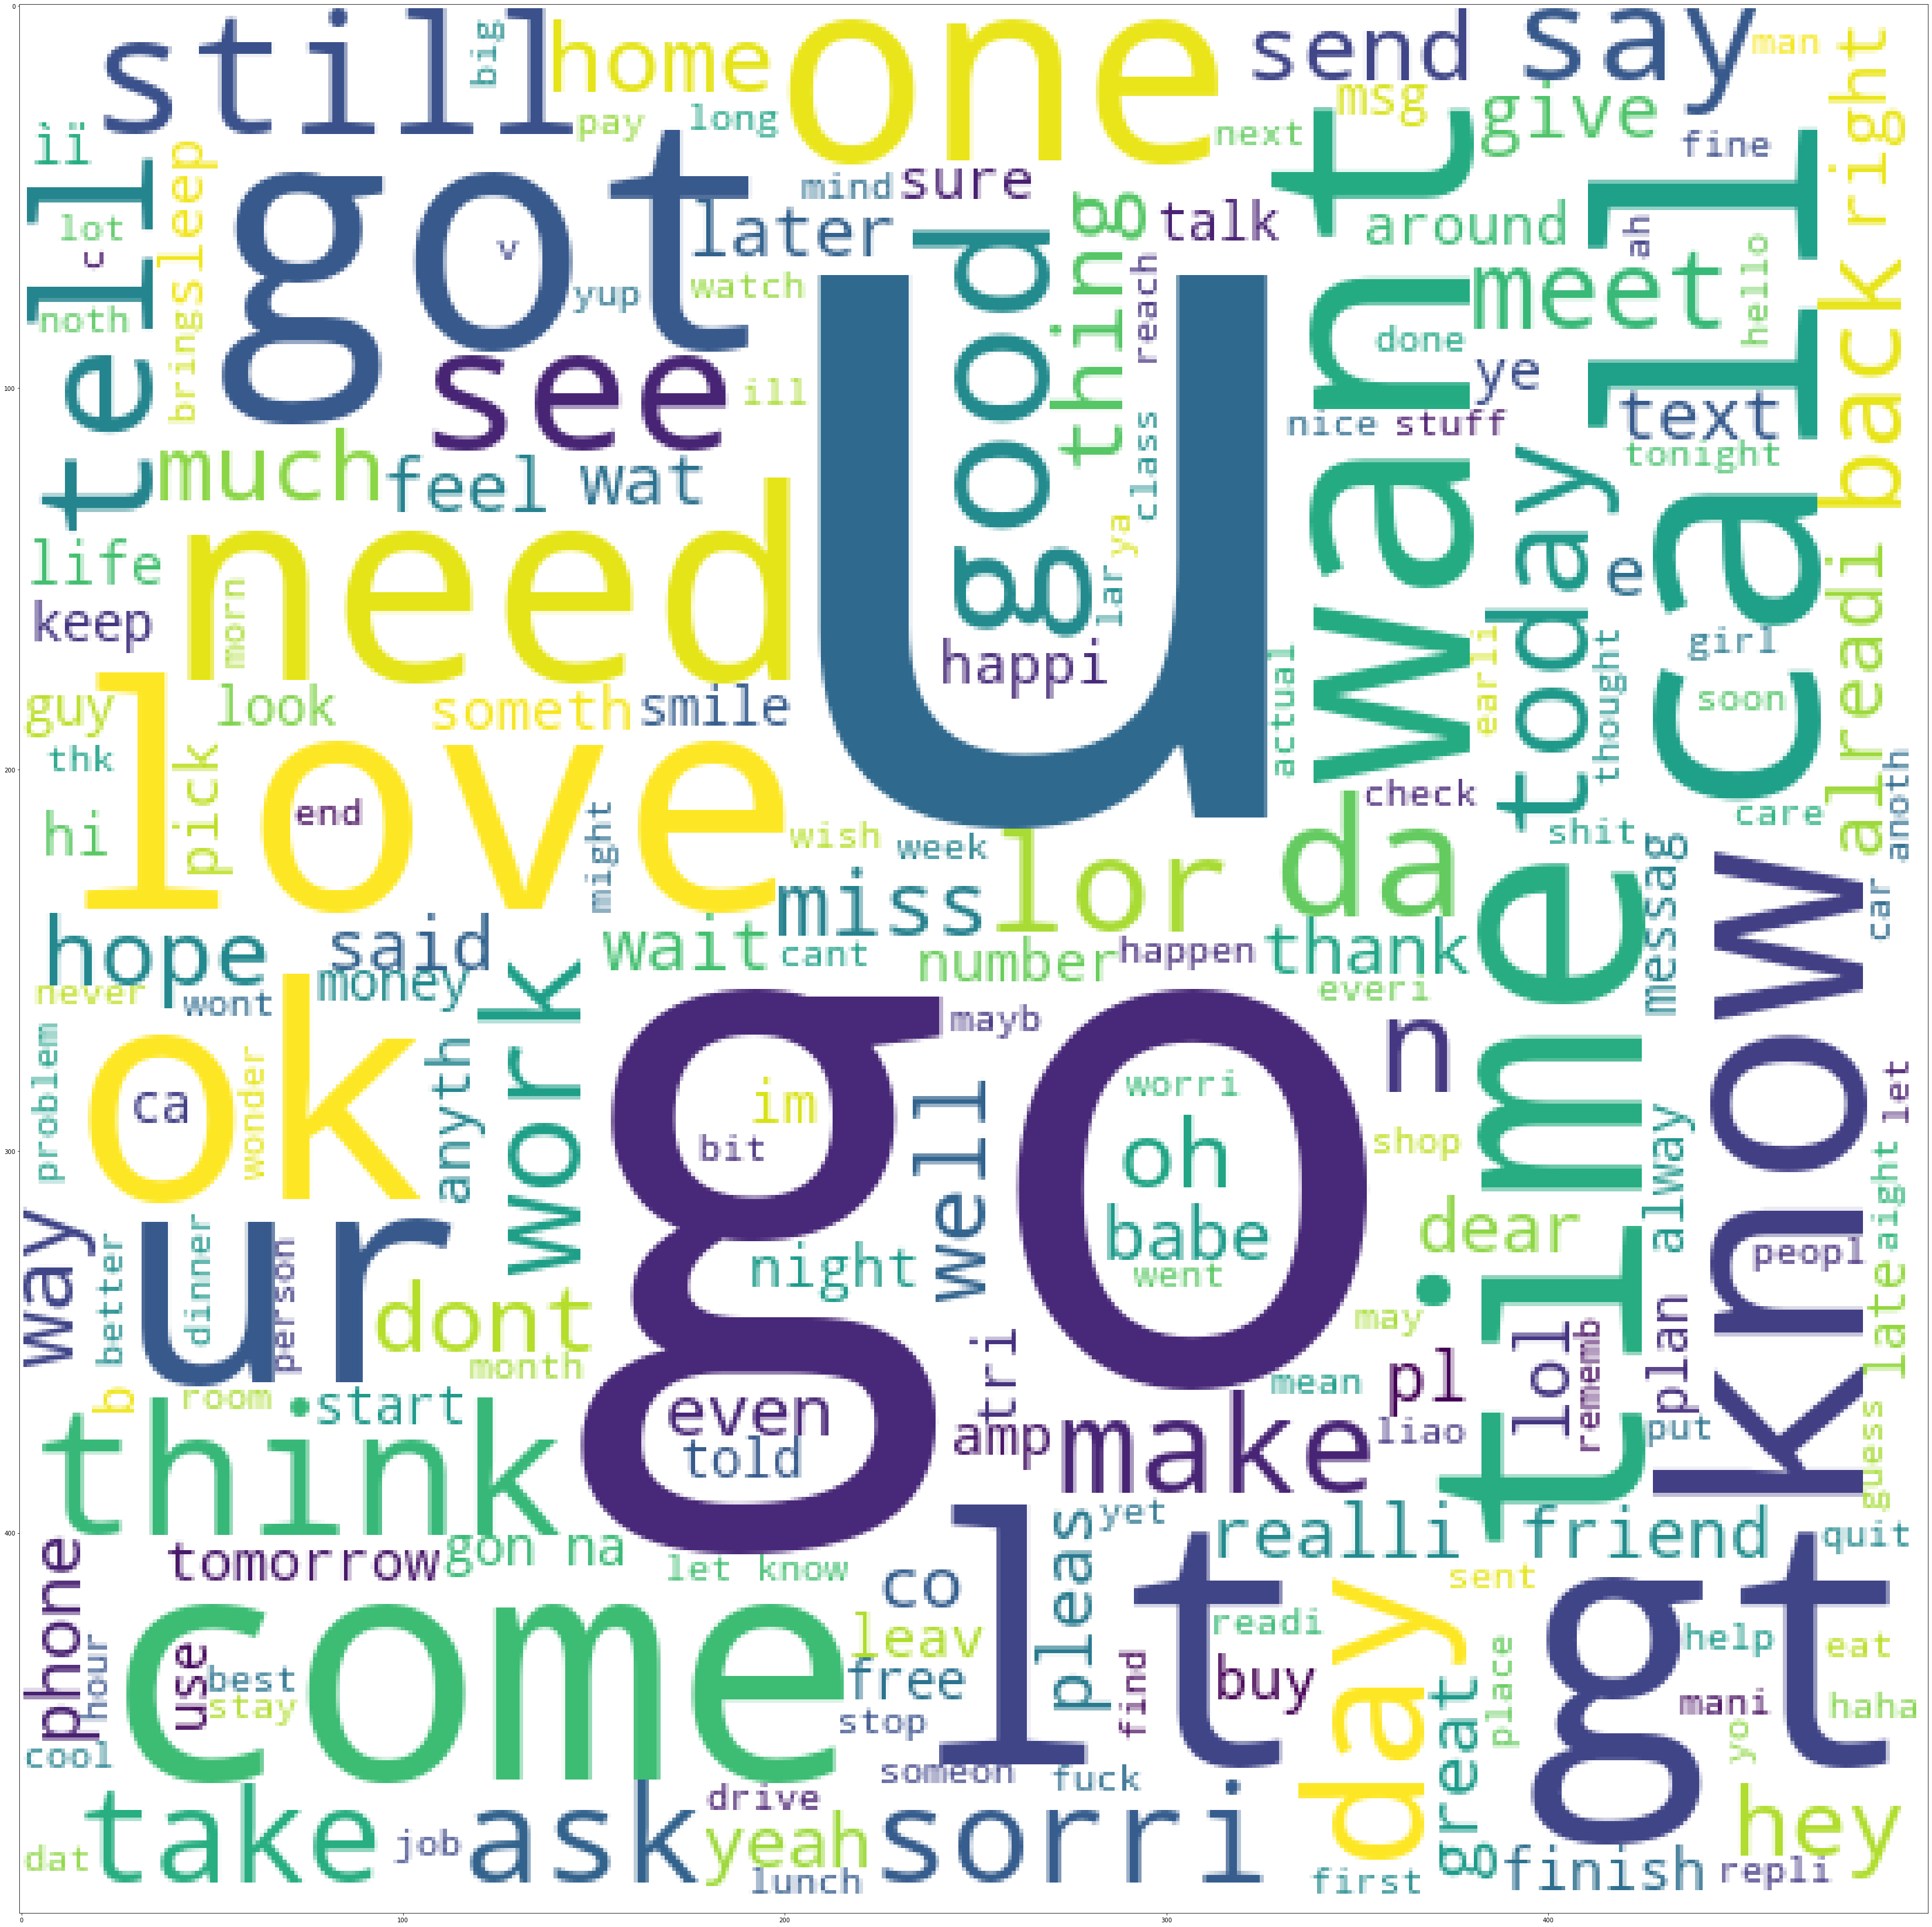

In [60]:
ham_wc=wc.generate(df[df['output']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(180,60))
plt.imshow(ham_wc)

In [62]:
spam_corpus=[]
for msg in df[df['output']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [63]:
len(spam_corpus)

9939

In [65]:
!pip install collections
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

ERROR: Could not find a version that satisfies the requirement collections (from versions: none)
ERROR: No matching distribution found for collections


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [70]:
ham_corpus=[]
for msg in df[df['output']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [71]:
len(ham_corpus)
pd.DataFrame(Counter(ham_corpus).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model Building

In [97]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [98]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [99]:
x.shape

(5169, 3000)

In [100]:
y=df['output'].values

In [101]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [104]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [105]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [106]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [107]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [108]:
#model improve 1.max_features=3000  2.minmaxscalar--no benifit in this  3.additional column chars--no benifit in this  4.voting clasifier--no benifit  5.stacking--no benifit

In [109]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))